In [5]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c facial-keypoints-detection

!mkdir keypoints

Saving kaggle.json to kaggle.json
 98% 75.0M/76.3M [00:00<00:00, 123MB/s]
100% 76.3M/76.3M [00:00<00:00, 104MB/s]


In [6]:
!unzip /content/facial-keypoints-detection.zip -d keypoints

Archive:  /content/facial-keypoints-detection.zip
  inflating: keypoints/IdLookupTable.csv  
  inflating: keypoints/SampleSubmission.csv  
  inflating: keypoints/test.zip      
  inflating: keypoints/training.zip  


In [7]:
!unzip /content/keypoints/training.zip -d keypoints/train


Archive:  /content/keypoints/training.zip
  inflating: keypoints/train/training.csv  


In [8]:
!unzip /content/keypoints/test.zip -d keypoints/test

Archive:  /content/keypoints/test.zip
  inflating: keypoints/test/test.csv  


In [9]:
import pandas as pd

df_facial = pd.read_csv('/content/keypoints/train/training.csv')
df_facial.shape

(7049, 31)

In [10]:
df_test = pd.read_csv('/content/keypoints/test/test.csv')
df_test.shape

(1783, 2)

In [11]:
df_test.dtypes

ImageId     int64
Image      object
dtype: object

In [12]:
df_facial.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [13]:
import numpy as np

image = np.array([int(x) for x in df_facial['Image'][0].split()]).reshape(96,96)
image

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [ ]:
df_test['Image'].values

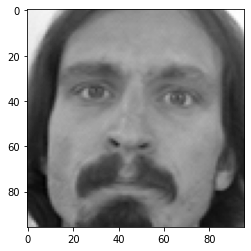

In [15]:
import matplotlib.pyplot as plt

plt.imshow(image , cmap = 'gray')

In [16]:
df_facial.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [17]:
df_facial.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [18]:
df_facial.duplicated().sum()

0

In [19]:
id_lookup = pd.read_csv('/content/keypoints/IdLookupTable.csv')
id_lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [20]:
mean = df_facial.describe().loc['mean']

In [21]:
for feature in df_facial.columns[:-1]:
  df_facial[feature].fillna(mean.loc[feature] , inplace = True)




In [22]:
df_facial.shape

(7049, 31)

In [23]:
df_facial.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

train , test_val = train_test_split(df_facial , test_size = 0.3 , random_state = 42)
val , test = train_test_split(test_val , test_size = 0.4 , random_state = 42 )

train.shape , val.shape , test.shape

((4934, 31), (1269, 31), (846, 31))

In [25]:
def generate_data(dataset):
  data = dataset.drop(columns = 'Image')
  y = data.values
  x = []

  for image in dataset['Image']:
    x.append(np.array([int(x) for x in image.split()]).reshape(96,96))

  x = np.array(x)

  return x , y 

In [26]:
x_train , y_train = generate_data(train)

x_train.shape

(4934, 96, 96)

In [27]:
y_train.shape

(4934, 30)

In [28]:
x_val , y_val = generate_data(val)

x_val.shape

(1269, 96, 96)

In [29]:
y_val.shape

(1269, 30)

In [30]:
def plot_image(image , keypoint , axis , title):
  image = image.reshape(96,96)
  axis.imshow(image , cmap = 'gray')
  axis.scatter(keypoint[0::2] , keypoint[1::2] , marker = 'x' , c = 'blue')
  plt.title(title)

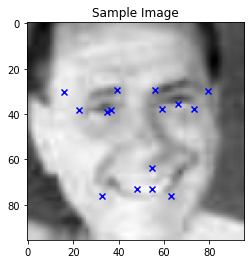

In [31]:
fig , axis = plt.subplots()

plot_image(x_val[0] , y_val[0] , axis , 'Sample Image')

In [32]:
x_test , y_test = generate_data(test)


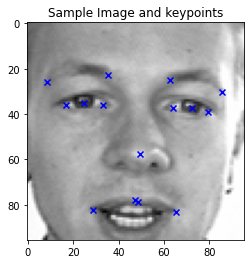

In [33]:
fig , ax = plt.subplots()
plot_image(x_test[0], y_test[0] , ax , 'Sample Image and keypoints')

In [34]:
df_test.shape

(1783, 2)

In [35]:
input_test = []

for img in df_test['Image']:
  input_test.append(np.array([int(x) for x in img.split()]).reshape(96,96))


In [36]:
input_test = np.array(input_test)/255
input_test.shape

(1783, 96, 96)

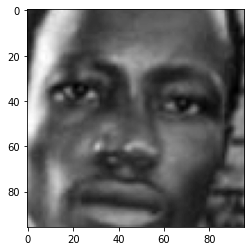

In [37]:
plt.imshow(x_train[9] , cmap = 'gray')

In [38]:
x_train.shape

(4934, 96, 96)

In [39]:
type(train)

pandas.core.frame.DataFrame

In [40]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape = (96,96,1))
x = layers.Flatten()(inputs)
x = layers.Dense(512 , activation = 'relu')(x)
x = layers.Dense(256 , activation = 'relu')(x)
x = layers.Dense(128 , activation = 'relu')(x)
outputs = layers.Dense(30 , activation = None)(x) # In this layer , we don't need activation function 

model = keras.Model(inputs , outputs)

model.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])

In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 30)                3870      
                                                                 
Total params: 4,887,198
Trainable params: 4,887,198
Non-train

In [42]:
input_train = x_train/255  
input_val = x_val/255  
eval_test = x_test/255

In [43]:
history = model.fit(input_train , y_train , validation_data = (input_val , y_val) , epochs = 30)

Epoch 1/30
155/155 [==============================] - 4s 6ms/step - loss: 206.4574 - mae: 10.2253 - val_loss: 130.6501 - val_mae: 8.5654
Epoch 2/30
155/155 [==============================] - 1s 5ms/step - loss: 123.9148 - mae: 8.3654 - val_loss: 139.7164 - val_mae: 8.8493
Epoch 3/30
155/155 [==============================] - 1s 5ms/step - loss: 112.0671 - mae: 7.9198 - val_loss: 109.5375 - val_mae: 7.8718
Epoch 4/30
155/155 [==============================] - 1s 5ms/step - loss: 104.4353 - mae: 7.6247 - val_loss: 103.6321 - val_mae: 7.6595
Epoch 5/30
155/155 [==============================] - 1s 5ms/step - loss: 97.9341 - mae: 7.3943 - val_loss: 102.8545 - val_mae: 7.5026
Epoch 6/30
155/155 [==============================] - 1s 5ms/step - loss: 92.4864 - mae: 7.1885 - val_loss: 88.6233 - val_mae: 7.0008
Epoch 7/30
155/155 [==============================] - 1s 5ms/step - loss: 85.5604 - mae: 6.8830 - val_loss: 85.9418 - val_mae: 6.8254
Epoch 8/30
155/155 [==============================] 

In [44]:
inputs = keras.Input(shape = (96,96,1))
x = layers.Flatten()(inputs)
x = layers.Dense(100 , activation = 'relu')(x)
outputs = layers.Dense(30 , activation = None )(x)

model_mdf = keras.Model(inputs , outputs)

model_mdf.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])

In [45]:
Performance =  model_mdf.fit(input_train , y_train , validation_data = (input_val , y_val) , epochs = 20)

Epoch 1/20
155/155 [==============================] - 1s 6ms/step - loss: 268.1740 - mae: 11.4089 - val_loss: 138.9712 - val_mae: 8.7752
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 127.0702 - mae: 8.4316 - val_loss: 124.8298 - val_mae: 8.3136
Epoch 3/20
155/155 [==============================] - 1s 4ms/step - loss: 118.0527 - mae: 8.1277 - val_loss: 118.4281 - val_mae: 8.1060
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 110.1182 - mae: 7.8379 - val_loss: 124.1741 - val_mae: 8.4594
Epoch 5/20
155/155 [==============================] - 1s 4ms/step - loss: 106.0093 - mae: 7.6847 - val_loss: 116.7442 - val_mae: 8.1771
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 101.6210 - mae: 7.5131 - val_loss: 104.1870 - val_mae: 7.6243
Epoch 7/20
155/155 [==============================] - 1s 4ms/step - loss: 100.6600 - mae: 7.4921 - val_loss: 111.4201 - val_mae: 7.7746
Epoch 8/20
155/155 [===========================

In [46]:
def performance(val_loss , train_loss , train_mae , val_mae , epochs):
  fig , axes = plt.subplot(1 , 2 , figsize = (10,10))
  for i in range(2):
    axes[i].scatter(train_loss , epochs)
    axes[i].plot(val_loss , epochs)
  plt.tight_layout()
  plt.show()

In [47]:
model.predict(input_val)[0]

40/40 [==============================] - 0s 2ms/step


array([67.28372 , 36.750736, 30.934649, 38.797928, 59.03875 , 37.72164 ,
       73.13919 , 37.429417, 36.75848 , 38.319023, 22.41244 , 38.373524,
       56.326534, 29.312027, 79.271614, 29.209328, 39.559612, 29.311565,
       15.956058, 30.787546, 52.440563, 64.57394 , 63.546677, 75.5704  ,
       32.954655, 76.10445 , 48.520676, 73.17421 , 52.022427, 77.50197 ],
      dtype=float32)

In [48]:
y_val[0]

array([66.05245714, 35.75655429, 34.78182857, 39.18869143, 59.15933944,
       37.94475233, 73.33047798, 37.70700831, 36.65260695, 37.98990191,
       22.38450448, 38.03349518, 56.06851308, 29.33267825, 79.48282586,
       29.73486073, 39.32213692, 29.50299847, 15.87117747, 30.42816591,
       54.612     , 63.59497714, 63.28573512, 75.97071434, 32.9004037 ,
       76.17976785, 47.97541157, 72.9194426 , 54.612     , 73.12866857])

In [49]:
model.evaluate(input_val , y_val , batch_size = 256)

5/5 [==============================] - 0s 7ms/step - loss: 5.8332 - mae: 1.4083


[5.83323860168457, 1.4083280563354492]

In [50]:
model.predict(eval_test)[0]

27/27 [==============================] - 0s 2ms/step


array([68.2618  , 37.98659 , 28.877241, 35.737957, 59.546947, 37.485874,
       74.26804 , 37.914597, 36.323654, 37.462593, 21.072153, 37.424175,
       56.595936, 28.530449, 81.07354 , 29.674873, 39.269245, 28.289661,
       15.092212, 29.632814, 48.225044, 60.561153, 63.100742, 77.37087 ,
       32.31408 , 76.98672 , 47.575703, 73.22997 , 47.166058, 84.34453 ],
      dtype=float32)

In [51]:
model.evaluate(eval_test , y_test , batch_size = 256)

4/4 [==============================] - 0s 6ms/step - loss: 5.5516 - mae: 1.4028


[5.551631927490234, 1.4027910232543945]

In [52]:
y_test[0]

array([72.37635398, 37.28189735, 24.53692035, 35.00389381, 64.18746903,
       37.31494513, 79.5899469 , 39.18023363, 33.26952212, 36.14289558,
       16.94357522, 36.14289558, 62.50449558, 24.75262301, 85.66428319,
       30.44780177, 35.16828319, 22.85428673,  8.59072566, 25.89170973,
       49.59546903, 57.78426903, 65.1619115 , 83.22265487, 28.71334513,
       82.46315044, 47.42060177, 77.78582655, 48.56947217, 78.97014625])

In [53]:
test_preds_1 = model.predict(input_test)
#test_preds_1

56/56 [==============================] - 0s 2ms/step


In [54]:
test_preds_2 = model_mdf.predict(input_test) 
#test_preds_2

56/56 [==============================] - 0s 2ms/step


In [55]:
# CREATING A SUBMISSION FILE

def create_submission(test_preds):
  feature_names = list(id_lookup['FeatureName'])
  image_ids = list(id_lookup['ImageId']-1)
  row_ids = list(id_lookup['RowId'])

  feature_list = []
  for feature in feature_names:
      feature_list.append(feature_names.index(feature))
      
  predictions = []
  for x,y in zip(image_ids, feature_list):
      predictions.append(test_preds[x][y])
      
  row_ids = pd.Series(row_ids, name = 'RowId')
  locations = pd.Series(predictions, name = 'Location')
  locations = locations.clip(0.0,96.0)
  submission_result = pd.concat([row_ids,locations],axis = 1)
  return submission_result

In [56]:
df_sub = create_submission(test_preds_1)
df_sub.to_csv('submission_1.csv' , index = False)

In [57]:
df_sub2 = create_submission(test_preds_2)
df_sub2.to_csv('submission_2.csv' , index = False)

In [58]:
inputs = keras.Input(shape = (96,96,1))
x = layers.Conv2D(16 , (3,3) , activation = 'relu')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(512 , activation = 'relu')(x)
x = layers.Dense(256 , activation = 'relu')(x)
x = layers.Dense(128 , activation = 'relu')(x)
outputs = layers.Dense(30 , activation = None)(x)

model_conv = keras.Model(inputs , outputs)

model_conv.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])

In [59]:
model_conv.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 35344)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               18096640  
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                           

In [60]:
hist_conv = model_conv.fit( input_train , y_train , validation_data = (input_val , y_val) , epochs = 30)

Epoch 1/30
155/155 [==============================] - 9s 14ms/step - loss: 155.1917 - mae: 6.6873 - val_loss: 14.8797 - val_mae: 2.5370
Epoch 2/30
155/155 [==============================] - 2s 10ms/step - loss: 11.2484 - mae: 2.1821 - val_loss: 8.6213 - val_mae: 1.8060
Epoch 3/30
155/155 [==============================] - 2s 10ms/step - loss: 8.2981 - mae: 1.7872 - val_loss: 7.5106 - val_mae: 1.6416
Epoch 4/30
155/155 [==============================] - 2s 10ms/step - loss: 7.5958 - mae: 1.6856 - val_loss: 9.0518 - val_mae: 2.0451
Epoch 5/30
155/155 [==============================] - 2s 10ms/step - loss: 7.5331 - mae: 1.7165 - val_loss: 7.6381 - val_mae: 1.6671
Epoch 6/30
155/155 [==============================] - 2s 10ms/step - loss: 7.0615 - mae: 1.6299 - val_loss: 7.8370 - val_mae: 1.8031
Epoch 7/30
155/155 [==============================] - 2s 10ms/step - loss: 6.8515 - mae: 1.6231 - val_loss: 7.7350 - val_mae: 1.8711
Epoch 8/30
155/155 [==============================] - 2s 10ms/ste

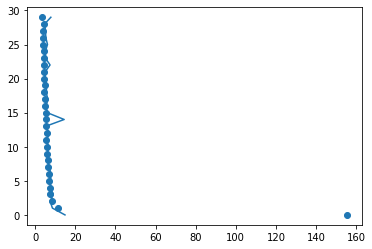

In [61]:
obj_hist = hist_conv.history

epochs = range(30)

plt.scatter(obj_hist['loss'] ,epochs )
plt.plot(obj_hist['val_loss'] , epochs )
plt.show()

In [62]:
model_conv.evaluate(input_val , y_val , batch_size = 256)

5/5 [==============================] - 0s 46ms/step - loss: 7.8465 - mae: 2.0310


[7.8464741706848145, 2.0309832096099854]

In [63]:
model_conv.evaluate(eval_test , y_test , batch_size = 256)

4/4 [==============================] - 0s 25ms/step - loss: 7.3731 - mae: 1.9997


[7.373072624206543, 1.9996696710586548]

In [64]:
test_preds_3 = model_conv.predict(input_test)

df_sub = create_submission(test_preds_3)
df_sub.to_csv('submission_3.csv' , index = False)

56/56 [==============================] - 0s 3ms/step


**DATA AUGMENTATION**

In [ ]:
# FLIPPING THE IMAGE 

def left_right_flip(images , keypoints):
  fld_keypoints = []
  flipped_imgs = np.flip(images , axis = 1)

  for id , sample_keypoints  in enumerate(keypoints):
    fld_keypoints.append(96 - coor if idx%2 != 0 else coor for idx , coor in enumerate(sample_keypoints))

  return flipped_imgs , fld_keypoints

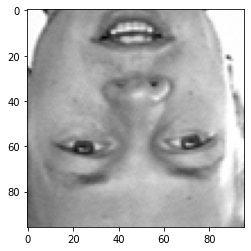

In [ ]:
new_images , new_keypoints = left_right_flip(eval_test , y_test)

plt.imshow(new_images[0] , cmap = 'gray')
plt.show()

In [ ]:
list(new_keypoints[0])

In [ ]:
y_test[0]

In [ ]:
df_facial.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

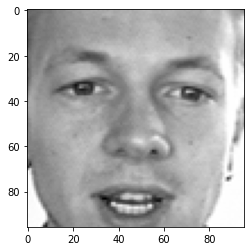

In [ ]:
plt.imshow(eval_test[0] , cmap = 'gray')

In [ ]:
# PERFORMING ROTATION AUGMENTATION 

def alter_brightness(images , keypoints):
  altered_images = []
  inc_images = np.clip(images*1.2 , 0.0 , 1.0)
  dec_images = np.clip(images*0.6 , 0.0 , 1.0)

  altered_images.extend(inc_images)
  altered_images.extend(dec_images)

  return np.array(altered_images) , keypoints

new_imgs , new_keypts = alter_brightness(eval_test , y_test)

In [ ]:
new_imgs.shape

(1692, 96, 96)

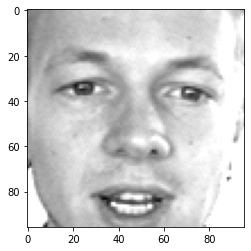

In [ ]:
plt.imshow(new_imgs[0] , cmap = 'gray')

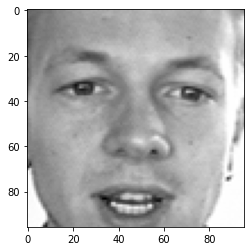

In [ ]:
plt.imshow(eval_test[0] , cmap = 'gray')

In [2]:
rotation_angles = [20]    # Rotation angle in degrees 
pixel_shifts = [20]    # Horizontal & vertical shift amount in pixels 

NUM_EPOCHS = 80
BATCH_SIZE = 64

In [3]:
import  cv2
import numpy as np

In [4]:
def rotate_augmentation(images, keypoints):
    rotated_images = []
    rotated_keypoints = []

    for angle in rotation_angles:    
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_rad = -angle*np.pi/180.     
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)
          
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.   
                for idx in range(0,len(rotated_keypoint),2):
                    rotated_keypoint[idx] = rotated_keypoint[idx]*np.cos(angle_rad)-rotated_keypoint[idx+1]*np.sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*np.sin(angle_rad)+rotated_keypoint[idx+1]*np.cos(angle_rad)
                rotated_keypoint += 48.   
                rotated_keypoints.append(rotated_keypoint)
            
    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

In [ ]:
rotated_images = rotate_augmentation()